In [1]:
import pandas as pd

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


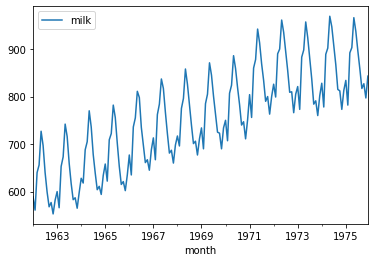

In [4]:
milk.plot()

In [5]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221248,
 0.6274267086030337,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [6]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


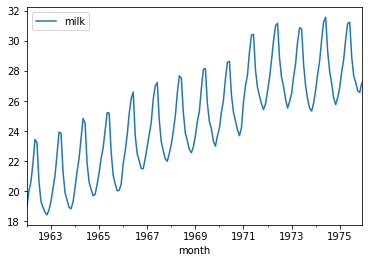

In [7]:
d = pd.DataFrame(milk.index.days_in_month, index=milk.index)
d.columns = ['milk']
milk = (milk / d)
milk.plot()

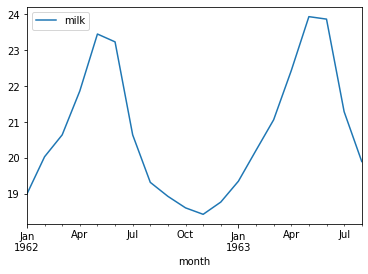

In [6]:
milk.iloc[:20].plot()

In [7]:
round(milk.values.sum(),2)

4166.33

In [16]:
milk

,milk
month,
1962-01-01,19.000000
1962-02-01,20.035714
1962-03-01,20.645161
1962-04-01,21.866667
1962-05-01,23.451613
...,...
1975-08-01,27.677419
1975-09-01,27.233333
1975-10-01,26.677419


(-2.7594694762289533, 0.06430054654174037, 11, 155, {'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}, -1.153997338105512)
(-2.1594860932888076, 0.22127672658830383, 12, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, -25.225679141303317)
(-5.481326334796926, 2.2808455518037347e-06, 11, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, -20.905137509892256)


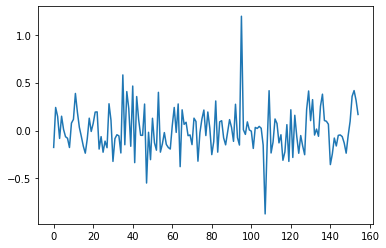

In [22]:
daily_diff12 = milk - milk.shift(12)
daily_diff1 = milk - milk.shift(1)
daily_diff12_1 = daily_diff12 - daily_diff12.shift(1)
daily_diff12_1 = daily_diff12_1.dropna().values
# milk.season_daily_diff1 = milk.daily_diff1.dropna() - milk.shift(12)
print(sm.tsa.stattools.adfuller(daily_diff1.dropna()))
print(sm.tsa.stattools.adfuller(daily_diff12.dropna()))
print(sm.tsa.stattools.adfuller(daily_diff12_1))
# milk.daily_diff1.plot()

import matplotlib.pyplot as plt
plt.plot(daily_diff12_1)
# milk.season_daily_diff1.plot()

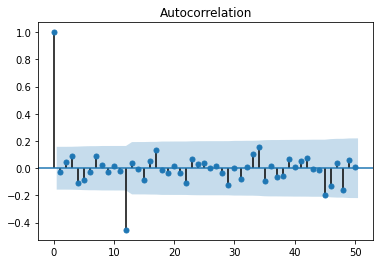

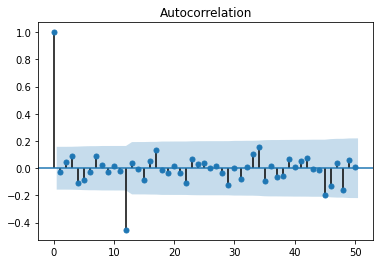

In [23]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(daily_diff12_1, lags=50)

In [27]:
s

array([-0.17626728,  0.24078341,  0.14731183, -0.0827957 ,  0.14946237,
        0.01182796, -0.06451613, -0.08064516, -0.17741935,  0.07741935,
        0.11612903,  0.38709677,  0.19283331,  0.03297314, -0.06236559,
       -0.16344086, -0.23655914, -0.08602151,  0.12903226, -0.00967742,
        0.07419355,  0.19247312,  0.19462366, -0.19354839, -0.06380105,
       -0.22652153, -0.11075269, -0.17956989,  0.27956989,  0.10752688,
       -0.32258065, -0.08494624, -0.04408602, -0.05591398, -0.2344086 ,
        0.58064516, -0.14861751,  0.40668203,  0.22903226, -0.16451613,
        0.46451613, -0.33548387,  0.35483871,  0.11397849, -0.04946237,
       -0.05053763,  0.27634409, -0.5483871 , -0.01843318, -0.30414747,
        0.12795699, -0.12795699, -0.20537634,  0.39892473, -0.22580645,
       -0.13978495, -0.02150538, -0.14516129, -0.17741935, -0.19354839,
        0.04953917,  0.24078341, -0.01935484,  0.27741935, -0.37741935,
        0.21612903,  0.06451613,  0.08602151, -0.05376344, -0.04

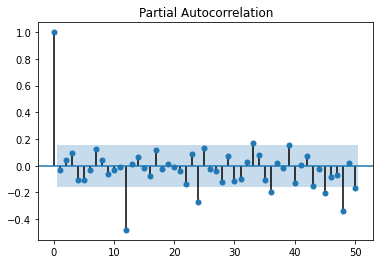

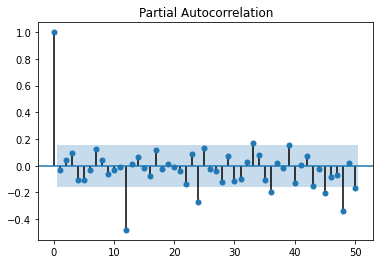

In [26]:
import statsmodels.api as sm
s = daily_diff12_1.squeeze()
sm.graphics.tsa.plot_pacf(s, lags=50)